# Analysis

* NOTE: Some of the sentiments of each organization may be skewed because of the account posting a video or image with no text description
* The CBS' twitter account has the highest overall positive sentiment, as its compound score is well above the positive sentiment threshold of 0.05 at around 0.35.
* The New York Times tweets have sentiments that mainly vary from positive to neutral with around 20 tweets that are more negative
* Fox News' twitter account sentiments vary as it may be negative one day and back to neutral another.

In [1]:
# Importing dependences
import pandas as pd
import random
import requests
import tweepy
import time
import json
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from pprint import pprint
# Setting authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Setting target users for VADER analysis
target_users = ["@BBC", "@CBS", "@CNN", "@FoxNews","@nytimes"]

In [6]:
# Setting list to store data for dataframe
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
unique_id = [] 
user_name= []
tweet_created_at = []
tweets_ago = []
tweet_content = [] 
# Looping through each target user in the list 
for user in target_users:    
    public_tweets = api.user_timeline(user,count=100, result_type="recent")
    counter = 0
    # Looping through each tweet 
    for tweet in public_tweets:
        # Appending the user to the user name list
        user_name.append(tweet["user"]["name"])
        # Appending to the unique_id list by each unique tweet ID
        tweet_id = tweet["id_str"]
        unique_id.append(tweet_id)
        #VADER analysis and appending to their resepctive lists
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        compound_list.append(compound)
        pos = results["pos"]
        positive_list.append(pos)
        neu = results["neu"]
        neutral_list.append(neu)
        neg = results["neg"]
        negative_list.append(neg)
        tweet_text = tweet["text"]
        tweet_tweet = re.search(r"([\w\.'\?\s@:!/#]+)", tweet_text)
        tweet_no_emoji = tweet_tweet.group(1)
        # Appending the tweet text to an empty list 
        tweet_content.append(tweet_no_emoji)
        # Appending to the tweet_created_at list to find the date when the tweet was made 
        creation_date = tweet["created_at"]
        tweet_created_at.append(creation_date)
        if tweet_id not in unique_id:
            unique_id.append(tweet_id)     
        # Putting everything into a dictionary 
        sentiments = ({"Tweet ID": unique_id,
                       "User": user_name,
                       "Tweet": tweet_content,
                      "Compound Score": compound_list,
                       "Positive Score": positive_list,
                       "Neutral Score": neutral_list,
                       "Negative Score": negative_list,
                       "Date": tweet_created_at,
                       "Tweets Ago": tweets_ago})
        # Counting how many tweets ago and accounting to the list 
        counter += 1        
        tweets_ago.append(counter)
# Creating a data frame to be used for graphs
sentiment_df = pd.DataFrame(sentiments)
sentiment_df = sentiment_df[["Tweet ID", "User","Tweet","Compound Score","Positive Score","Neutral Score","Negative Score","Tweets Ago","Date"]]
print(len(sentiment_df))
sentiment_df
sentiment_df.to_csv("news_sentiment.csv",encoding="UTF-8")
print(sentiment_df)

500
                Tweet ID                User  \
0    1006612367168417792                 BBC   
1    1006598774943346689                 BBC   
2    1006582170725601280                 BBC   
3    1006566811306024961                 BBC   
4    1006560982028734470                 BBC   
5    1006555449410379777                 BBC   
6    1006552181091241986                 BBC   
7    1006546212080611330                 BBC   
8    1006522020358737920                 BBC   
9    1006510330745417728                 BBC   
10   1006506489425645568                 BBC   
11   1006492482216038405                 BBC   
12   1006492066095030272                 BBC   
13   1006481662576906241                 BBC   
14   1006478794465665024                 BBC   
15   1006469890549665792                 BBC   
16   1006452473052192768                 BBC   
17   1006446077153857536                 BBC   
18   1006437975121694720                 BBC   
19   1006430945115869184            

# News Tweets Sentiment Scatter Plot

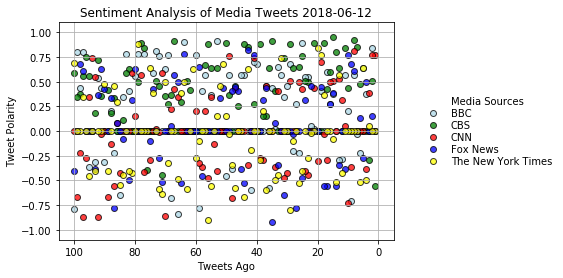

In [7]:
# Separating each tweet into their respective users
bbc = sentiment_df[sentiment_df["User"] == "BBC"]
cbs = sentiment_df[sentiment_df["User"] == "CBS"]
cnn = sentiment_df[sentiment_df["User"] == "CNN"]
fox = sentiment_df[sentiment_df["User"] == "Fox News"]
nytimes = sentiment_df[sentiment_df["User"] == "The New York Times"]
# Setting plots for each user 
plt.scatter(bbc["Tweets Ago"], bbc["Compound Score"],c="lightblue",alpha=0.75,edgecolor="black",label="BBC")
plt.scatter(cbs["Tweets Ago"], cbs["Compound Score"],c="green",alpha=0.75,edgecolor="black",label="CBS")
plt.scatter(cnn["Tweets Ago"], cnn["Compound Score"],c="red",alpha=0.75,edgecolor="black",label="CNN")
plt.scatter(fox["Tweets Ago"], fox["Compound Score"],c="blue",alpha=0.75,edgecolor="black",label="Fox News")
plt.scatter(nytimes["Tweets Ago"], nytimes["Compound Score"],c="yellow",alpha=0.75,edgecolor="black",label="The New York Times")
cur_date = datetime.now()
cur_date = cur_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Media Tweets {cur_date}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(105,-5)
plt.ylim(-1.1,1.1)
legend = plt.legend(frameon=False,labelspacing=0.2,loc="right",bbox_to_anchor=(1.5, 0.5))
legend.set_title("Media Sources")
legend.legendHandles[0]
legend.legendHandles[1]
legend.legendHandles[2]
legend.legendHandles[3]
legend.legendHandles[4]
plt.grid()
plt.savefig("plots/sentiment_scatter_plot.png",dpi="figure",bbox_inches="tight")
plt.show()

# Overall Media Sentiment Based on Twitter

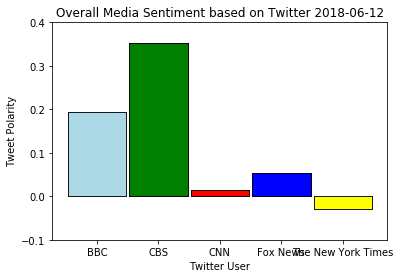

In [8]:
#Alt
# Separating each tweet into their respective users
bbc = sentiment_df[sentiment_df["User"] == "BBC"]
cbs = sentiment_df[sentiment_df["User"] == "CBS"]
cnn = sentiment_df[sentiment_df["User"] == "CNN"]
fox = sentiment_df[sentiment_df["User"] == "Fox News"]
nytimes = sentiment_df[sentiment_df["User"] == "The New York Times"]
# Finding the average sentiment of each user's tweets
bbc_avg = bbc["Compound Score"].mean()
cbs_avg = cbs["Compound Score"].mean()
cnn_avg = cnn["Compound Score"].mean()
fox_avg = fox["Compound Score"].mean()
nytimes_avg = nytimes["Compound Score"].mean()
# Setting plots for each user 
plt.bar(bbc["User"], bbc_avg,width=0.95,color="lightblue",alpha=0.75,edgecolor="black",label="BBC")
plt.bar(cbs["User"], cbs_avg,width=0.95,color="green",alpha=0.75,edgecolor="black",label="CBS")
plt.bar(cnn["User"], cnn_avg,width=0.95,color="red",alpha=0.75,edgecolor="black",label="CNN")
plt.bar(fox["User"], fox_avg,width=0.95,color="blue",alpha=0.75,edgecolor="black",label="Fox News")
plt.bar(nytimes["User"], nytimes_avg,width=0.95,color="yellow",alpha=0.75,edgecolor="black",label="The New York Times")
plt.ylim(-0.1,0.4)
plt.title(f"Overall Media Sentiment based on Twitter {cur_date}")
plt.xlabel("Twitter User")
plt.ylabel("Tweet Polarity")
plt.savefig("plots/overall_media_sentiment.png")
plt.show()